## Latihan 2 - Titanic Dataset

### Tentang Dataset

*Jenis Data:* Data terkait kecelakaan kapal Titanic\

*Jumlah Fitur:* Termasuk informasi seperti kelas tiket, usia, jenis kelamin, jumlah saudara
kandung atau pasangan, jumlah orang tua atau anak-anak, biaya tiket, dan lainnya.

*Target:* Variabel target umumnya adalah apakah seorang penumpang selamat atau tidak
selamat (0 untuk tidak selamat, 1 untuk selamat).

*Penamaan Kolom yang digunakan:*
1. Passenger ID : Mengidentifikasi penumpang, fitur numerik (IDE Penumpang/Nomor
Tiket)\
2. Survived : Menjelaskan keselamatan penumpang, Nilai 1 menandakan penumpang
selamat dan 0 tidak selamat.\
3. Pclass : Kelas Tiket (1 = 1 (Atas), 2 = 2 (Tengah), 3 = 3 (bawah)).\
4. Age : Usia dalam tahun\
5. Sibsp : Jumlah saudara kandung/pasangan di kapal Titanic\
6. Parch : Jumlah orang tua/anak di kapal Titanic\
7. Ticket : Nomor tiket\
8. Fare : Tarif Penumpang\
9. Cabin : Nomor kabin\
10. Embarked : Awal naik penumpang ke kapal Titanic (Pelabuhan Embarkasi. C =\
11. Cherbourg, Q = Queenstown, S = Southampton)\

### Import Library

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

### Load the Titanic dataset

In [66]:
dataTrain = pd.read_csv("input/titanicTrain.csv")
dataTest = pd.read_csv("input/titanicTest.csv")

### Explore the dataset and handle any missing values

In [67]:
dataTrain['Name_Title'] = dataTrain['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])
dataTrain['Name_Title'].value_counts()

Name_Title
Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Major.         2
Col.           2
the            1
Capt.          1
Ms.            1
Sir.           1
Lady.          1
Mme.           1
Don.           1
Jonkheer.      1
Name: count, dtype: int64

In [68]:
dataTest['Name_Title'] = dataTest['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])
dataTest['Name_Title'].value_counts()

Name_Title
Mr.        240
Miss.       78
Mrs.        72
Master.     21
Col.         2
Rev.         2
Ms.          1
Dr.          1
Dona.        1
Name: count, dtype: int64

##### Mencetak 5 Data Pertama

In [69]:
dataTrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.


In [70]:
dataTest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr.
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs.
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr.
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr.
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs.


##### Mencari informasi dan deskripsi dari dataset

In [71]:
dataTrain.info()
dataTrain.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Name_Title   891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [72]:
dataTest.info()
dataTest.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Name_Title   418 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 39.3+ KB


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


##### Cek apakah ada missing value atau tidak

In [73]:
dataTrain.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Name_Title       0
dtype: int64

Berdasarkan data di atas, dapat diketahui bahwa ada 3 kolom yang memiliki missing value pada dataset training, yakni variabel age, cabin, dan embarked

In [74]:
dataTest.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Name_Title       0
dtype: int64

Berdasarkan data di atas, dapat diketahui bahwa ada 3 kolom yang memiliki missing value pada dataset testing, yakni variabel age, fare, dan cabin

##### Handle Missing Value

In [75]:
dataTrain.dropna(inplace=True)
dataTest.dropna(inplace=True)

##### Cek kembali apakah masih ada data yang null

In [76]:
dataTrain.isnull().sum()
dataTest.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Name_Title     0
dtype: int64

In [77]:
dataTrain.drop(['Name','Ticket', "Cabin"],axis = 1, inplace = True)
dataTest.drop(['Name','Ticket', "Cabin"],axis = 1, inplace = True)

### Preprocess the data

#### Normalisasi data

In [78]:
label_encoder = LabelEncoder()
dataTrain['Sex'] = label_encoder.fit_transform(dataTrain['Sex'])
dataTrain['Embarked'] = label_encoder.fit_transform(dataTrain['Embarked'])
dataTrain['Name_Title'] = label_encoder.fit_transform(dataTrain['Name_Title'])

dataTest['Sex'] = label_encoder.fit_transform(dataTest['Sex'])
dataTest['Embarked'] = label_encoder.fit_transform(dataTest['Embarked'])
dataTest['Name_Title'] = label_encoder.fit_transform(dataTest['Name_Title'])

In [79]:
scaler = StandardScaler()
feature_numerik = ["Age","Fare"]
dataTrain[feature_numerik] = scaler.fit_transform(dataTrain[feature_numerik])
dataTest[feature_numerik] = scaler.fit_transform(dataTest[feature_numerik])

### Split the dataset into training and testing sets.

In [80]:
X = dataTrain.drop(['Survived'],axis=1)
y = dataTrain['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=True, random_state=5)

### Train a classification model using Logistic Regression

In [81]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

c:\Users\kekop\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Evaluate the model's performance on the testing set

In [82]:
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

# Menampilkan hasil evaluasi
print("Model Regresi Logistik :")
print("Akurasi: {:.2f}".format(accuracy*100), "%")
print("Presisi: {:.2f}".format(precision*100), "%")
print("Sensitivitas: {:.2f}".format(recall*100), "%")

Model Regresi Logistik :
Akurasi: 75.68 %
Presisi: 73.08 %
Sensitivitas: 90.48 %


c:\Users\kekop\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


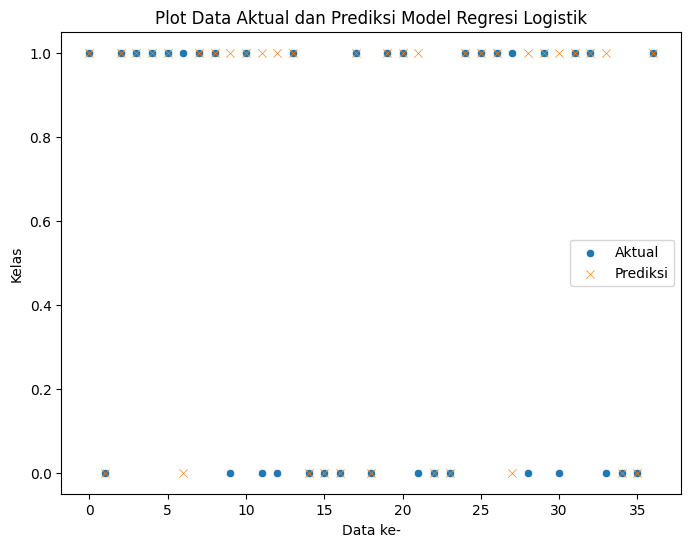

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Misalkan Anda sudah memiliki X_train, X_test, y_train, y_test yang sudah disiapkan

# Inisialisasi dan melatih model regresi logistik
model = LogisticRegression()
model.fit(X_train, y_train)

# Melakukan prediksi menggunakan data uji
y_pred = model.predict(X_test)

# Membuat DataFrame dari data aktual dan hasil prediksi
plot_data = pd.DataFrame({'Aktual': y_test, 'Prediksi': y_pred})

# Menambahkan kolom indeks untuk plot
plot_data['Index'] = range(len(plot_data))

# Membuat scatter plot untuk membandingkan data aktual dan hasil prediksi
plt.figure(figsize=(8, 6))
sns.scatterplot(data=plot_data, x='Index', y='Aktual', label='Aktual', marker='o')
sns.scatterplot(data=plot_data, x='Index', y='Prediksi', label='Prediksi', marker='x')
plt.xlabel('Data ke-')
plt.ylabel('Kelas')
plt.title('Plot Data Aktual dan Prediksi Model Regresi Logistik')
plt.legend()
plt.show()


Kelas 1 : berarti kemungkinan penumpang selamat\
Kelas 0 : berarti kemungkinan penumpang tidak selamat\

*Jika ada tanda aktual dan prediksi pada 1 plot, maka berarti prediksi bernilai benar